# `HOUSE DAMAGE PREDICTION`


## 1) Problem Statement

> The problem we aim to solve in this project is to develop a predictive model that can accurately forecast the level of damage caused to buildings during earthquakes. Mathematical model representation for this problem can be achieved or simulated through the use of various machine learning classification models, especially supervised ML algorithms like `RandomForest`, `DecisionTree`, `Multinomial Logistic Regression`, `XGBoost`, etc. and even unsupervised ML algorithms that consider various factors like age, land surface condition, foundation type, etc.
 

## 2) `About Datasets`
### Dataset Source

The dataset we will use for the model training and testing is provided by the "Richter's Predictor: Modelling Earthquake Damage" competition on DrivenData.
https://www.drivendata.org/competitions/57/nepal-earthquake/page/136


### Dataset information

The dataset consist of 38 features and 260601 data points.
Our datasets consist of three files:

i) train_values.csv - consists of 38 different features

ii) train_labels.csv - consists of corresponding label values

iii) test_values.csv - for making prediction on unseen data by our model


* `geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int)`: geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* `count_floors_pre_eq (type: int)`: number of floors in the building before the earthquake.
* `age (type: int)`: age of the building in years.
* `area_percentage (type: int)`: normalized area of the building footprint.
* `height_percentage (type: int)`: normalized height of the building footprint.
* `land_surface_condition (type: categorical)`: surface condition of the land where the building was built. Possible values: n, o, t.
* `foundation_type (type: categorical)`: type of foundation used while building. Possible values: h, i, r, u, w.
* `roof_type (type: categorical)`: type of roof used while building. Possible values: n, q, x.
* `ground_floor_type (type: categorical)`: type of the ground floor. Possible values: f, m, v, x, z.
* `other_floor_type (type: categorical)`: type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* `position (type: categorical)`: position of the building. Possible values: j, o, s, t.
* `plan_configuration (type: categorical)`: building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* `has_superstructure_adobe_mud (type: binary)`: flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone (type: binary)`: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag (type: binary)`: flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone (type: binary)`: flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* `has_superstructure_mud_mortar_brick (type: binary)`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick (type: binary)`: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber (type: binary)`: flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo (type: binary)`: flag variable that indicates if the superstructure was made of Bamboo* .
* `has_superstructure_rc_non_engineered (type: binary)`: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete .
* `has_superstructure_rc_engineered (type: binary)`: flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other (type: binary)`: flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status (type: categorical)`: legal ownership status of the land where building was built. Possible values: a, r, v, w.
* `count_families (type: int)`: number of families that live in the building.
* `has_secondary_use (type: binary)`: flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture (type: binary)`: flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel (type: binary)`: flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental (type: binary)`: flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution (type: binary)`: flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school (type: binary)`: flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry (type: binary)`: flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post (type: binary)`: flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office (type: binary)`: flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police (type: binary)`: flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other (type: binary)`: flag variable that indicates if the building was secondarily used for other purposes.


## Step-1: `Importing required libraries and packages.`
**Importing Pandas, Numpy, Matplotlib, Seaborn, other preprocessing pacakges and Warnings Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats.mstats import winsorize
from collections import Counter
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

## Step-2: `Loading our Datasets.`

**Loading the CSV data files as Pandas DataFrame**

In [2]:
df_features = pd.read_csv("data/train_values.csv")
df_labels = pd.read_csv("data/train_labels.csv")

**Showing Top 5 Records**

In [3]:
df_features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


**Merging `df_features` and `df_labels` data frames on their common attribute `building_id` into one main df for analysis**

In [5]:
df = pd.merge(df_features, df_labels, on='building_id')

In [6]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


**What about the Shape of the dataset?**

In [7]:
df.shape

(260601, 40)

## Step-3: `EDA and Visulaization.`
##  Data Checks to perform

* Check missing values
* Check duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of the data set
* Check various categories present in the different categorical column

### i) Check Missing Values

In [8]:
df.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

**There are no missing values in the data set.**

### ii) Check Duplicates

In [9]:
df.duplicated().sum()

0

**There are no duplicates values in the data set**

### iii) Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

**There are two different datatypes in our datasets -- `object - categorical(ordinal/nominal)` and `numericals - integers/floats/binary`**

### iv) Checking the number of unique values of each column

**Drop `building_id` column**

In [11]:
df = df.drop(columns='building_id')

In [12]:
df.nunique()

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

**`Seperating Numerical and Categorical features`**

> We are identifying numrical and categorical features in our datasets in order to have their seapare analysis.

In [13]:
# continuous_features = [
#     'count_floors_pre_eq',
#     'age', 'area_percentage',
#     'height_percentage',
#     'count_families'
# ]
# binary_features = [
#     'has_superstructure_adobe_mud', 
#     'has_superstructure_mud_mortar_stone',
#     'has_superstructure_stone_flag',
#     'has_superstructure_cement_mortar_stone',
#     'has_superstructure_mud_mortar_brick',
#     'has_superstructure_cement_mortar_brick',
#     'has_superstructure_timber',
#     'has_superstructure_bamboo',
#     'has_superstructure_rc_non_engineered',
#     'has_superstructure_rc_engineered',
#     'has_superstructure_other']
# df_continuous_features = df[continuous_features]
# df_categorical_features = df.loc[:, ~df.columns.isin(continuous_features)]
# df_binary_features = df[binary_features]

In [14]:
cat_features = list(df.select_dtypes(include=['O']).columns)
numerical_features = list(df.select_dtypes(include=np.number).columns)

In [15]:
# Listing categorical features in our dataset
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [16]:
# number of categorical features in our dataset
print(len(cat_features))

8


In [17]:
# Listing numerical features in our dataset
numerical_features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'damage_grade']

> Here lots of features are in `numerical form` although they are actually `categorical type` like `damage_grade`. Others are treated as numerical features except `damage_grade` which is our target variable for this project. You can treat some of features like `count_floors_pre_eq` as categorical too.

**Removing 'damage_grade' from numerical_features**

In [18]:
numerical_features.remove('damage_grade')

In [19]:
# number of numerical features in our dataset
print(len(numerical_features))

30


### v) Visualizing statistics of dataset

**i) Numerical Features**

> Before that, let's first identify `binary features` from numerical features

In [20]:
"""
Separates binary features from numerical features by comparing size and [0 1] values

"""

val1 = np.array([0, 1])
val2 = np.array([1, 0])
binary_features = []
flag = True
for attr in numerical_features:
    attr_val = df[attr].unique()
    if attr_val.size == val1.size and ((attr_val == val1).all()):
        binary_features.append(attr)
        flag = False
    if flag:
            if attr_val.size == val2.size and ((attr_val == val2).all()):
                binary_features.append(attr)
                flag = True

In [21]:
binary_features

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [22]:
len(binary_features)

22

In [23]:
other_numerical_features = list(set(numerical_features).difference(set(binary_features)))

In [24]:
other_numerical_features

['height_percentage',
 'geo_level_3_id',
 'age',
 'geo_level_2_id',
 'geo_level_1_id',
 'area_percentage',
 'count_families',
 'count_floors_pre_eq']

In [25]:
len(other_numerical_features)

8

In [26]:
df_other_numerical_features = df[other_numerical_features]
df_other_numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0


**Insight:**
From the above description of numerical data, we can see that means are far from each other.
* Many attributes such as `age` have larger difference between their maximum and minimum values. 
* Also, some of them have larger standard deviation and their min and max values are far from their mean values

So, it is better to perform some preprocessing like Standardization o Normalization to bring them all in similar ranges. We performed Standardization later.

**ii) Catgeorical Features**

In [27]:
df.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


**Insight:**

* There are 3 different values for `land_surface_condition` with `t` as its mode.
* There are 5 different values for `foundation_type` with `r` as its mode.
* There are 3 different values for `roof_type` with `n` as its mode.
* There are 5 different values for `ground_floor_type` with `f` as its mode.
* There are 4 different values for `other_floor_type` with `q` as its mode.
* There are 4 different values for `position` with `s` as its mode.
* There are 10 different values for `plan_configuration` with `d` as its mode.
* There are 4 different values for `legal_ownership_status` with `v` as its mode.

**iii) Binary Features**

In [28]:
df_binary_features = df[binary_features]
for col in binary_features:
    print(f"{col} proportion")
    print(df_binary_features[col].value_counts(normalize=True))
    print(" ")

has_superstructure_adobe_mud proportion
0    0.911355
1    0.088645
Name: has_superstructure_adobe_mud, dtype: float64
 
has_superstructure_mud_mortar_stone proportion
1    0.761935
0    0.238065
Name: has_superstructure_mud_mortar_stone, dtype: float64
 
has_superstructure_stone_flag proportion
0    0.965668
1    0.034332
Name: has_superstructure_stone_flag, dtype: float64
 
has_superstructure_cement_mortar_stone proportion
0    0.981765
1    0.018235
Name: has_superstructure_cement_mortar_stone, dtype: float64
 
has_superstructure_mud_mortar_brick proportion
0    0.931846
1    0.068154
Name: has_superstructure_mud_mortar_brick, dtype: float64
 
has_superstructure_cement_mortar_brick proportion
0    0.924732
1    0.075268
Name: has_superstructure_cement_mortar_brick, dtype: float64
 
has_superstructure_timber proportion
0    0.745012
1    0.254988
Name: has_superstructure_timber, dtype: float64
 
has_superstructure_bamboo proportion
0    0.914989
1    0.085011
Name: has_superstructure

## Visualization

> Let's have some visualization over distribution and relationships among datasets

### i. Distribution of target attribute --`damage_grade`

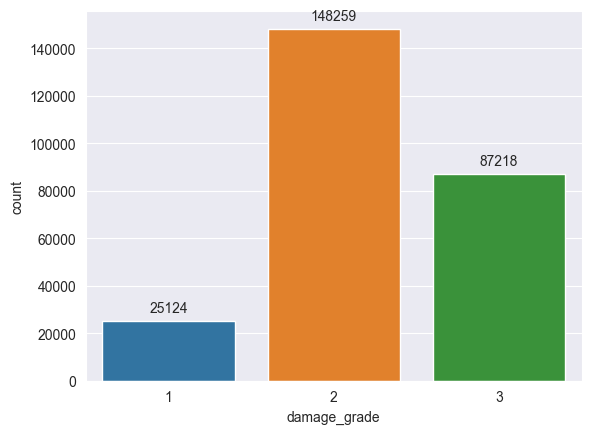

In [29]:
# countplot
ax = sns.countplot(x='damage_grade', data=df)

# annotate each bar with the count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

>From this, we can see that our dataset is highly imbalanced so that we need to balance our datasets using various techniques like `Resampling`, `Smote`, etc. These techniques are applied later on.

### ii) Distribution of `other_numerical_features`

In [30]:
len(other_numerical_features)

8

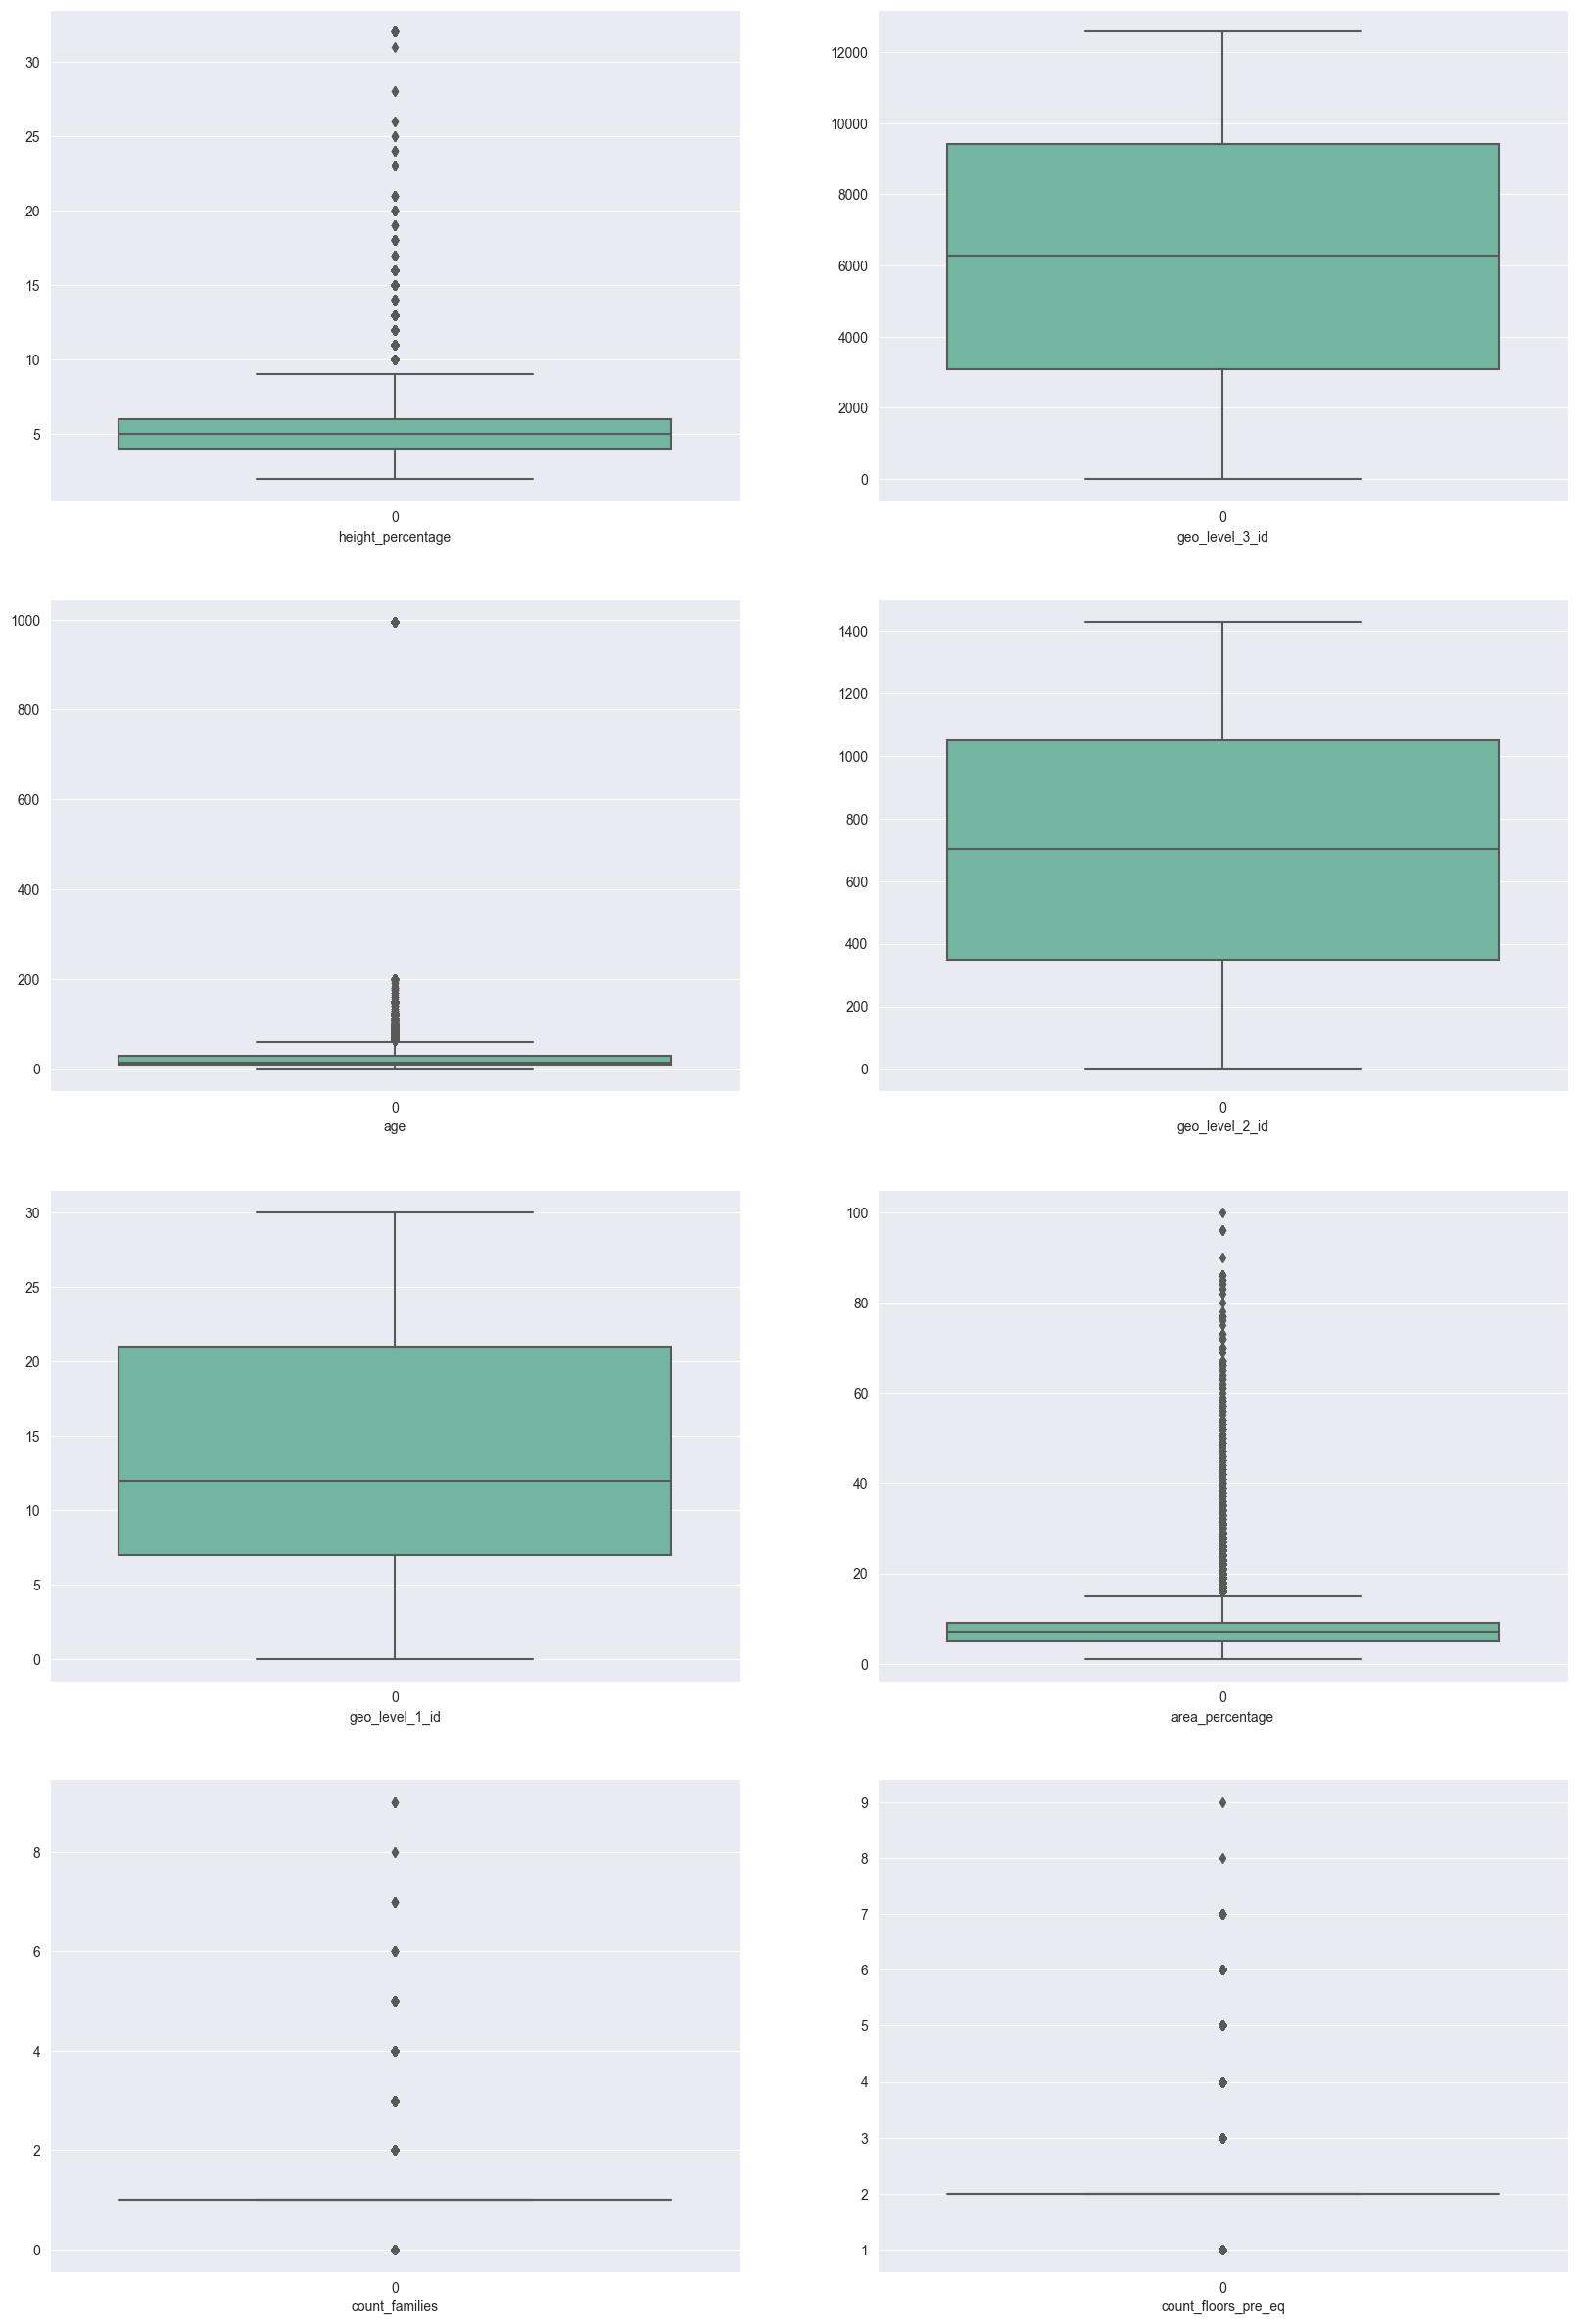

In [31]:
def plot_boxplot(columns):
    fig, axes = plt.subplots(4, 2, figsize=(20, 30))
    for ax, col in zip(axes.flatten(), columns):
        sns.boxplot(df[col], ax=ax, palette='Set2')
        ax.set_xlabel(col)
    plt.show()

plot_boxplot(other_numerical_features)

Here we, can see some outliers in our features that needs to be handled.

* `age` has outliers as large proportion of values for age attribute are within 100 years except some, which goes up to 995 years. Also, from research, we came to know that age of buildings in Nepal were around 1000 years old.

Although, we use technique called 'Winsorization` to handle these oultiers.

### iii) Distribution of `binary features`

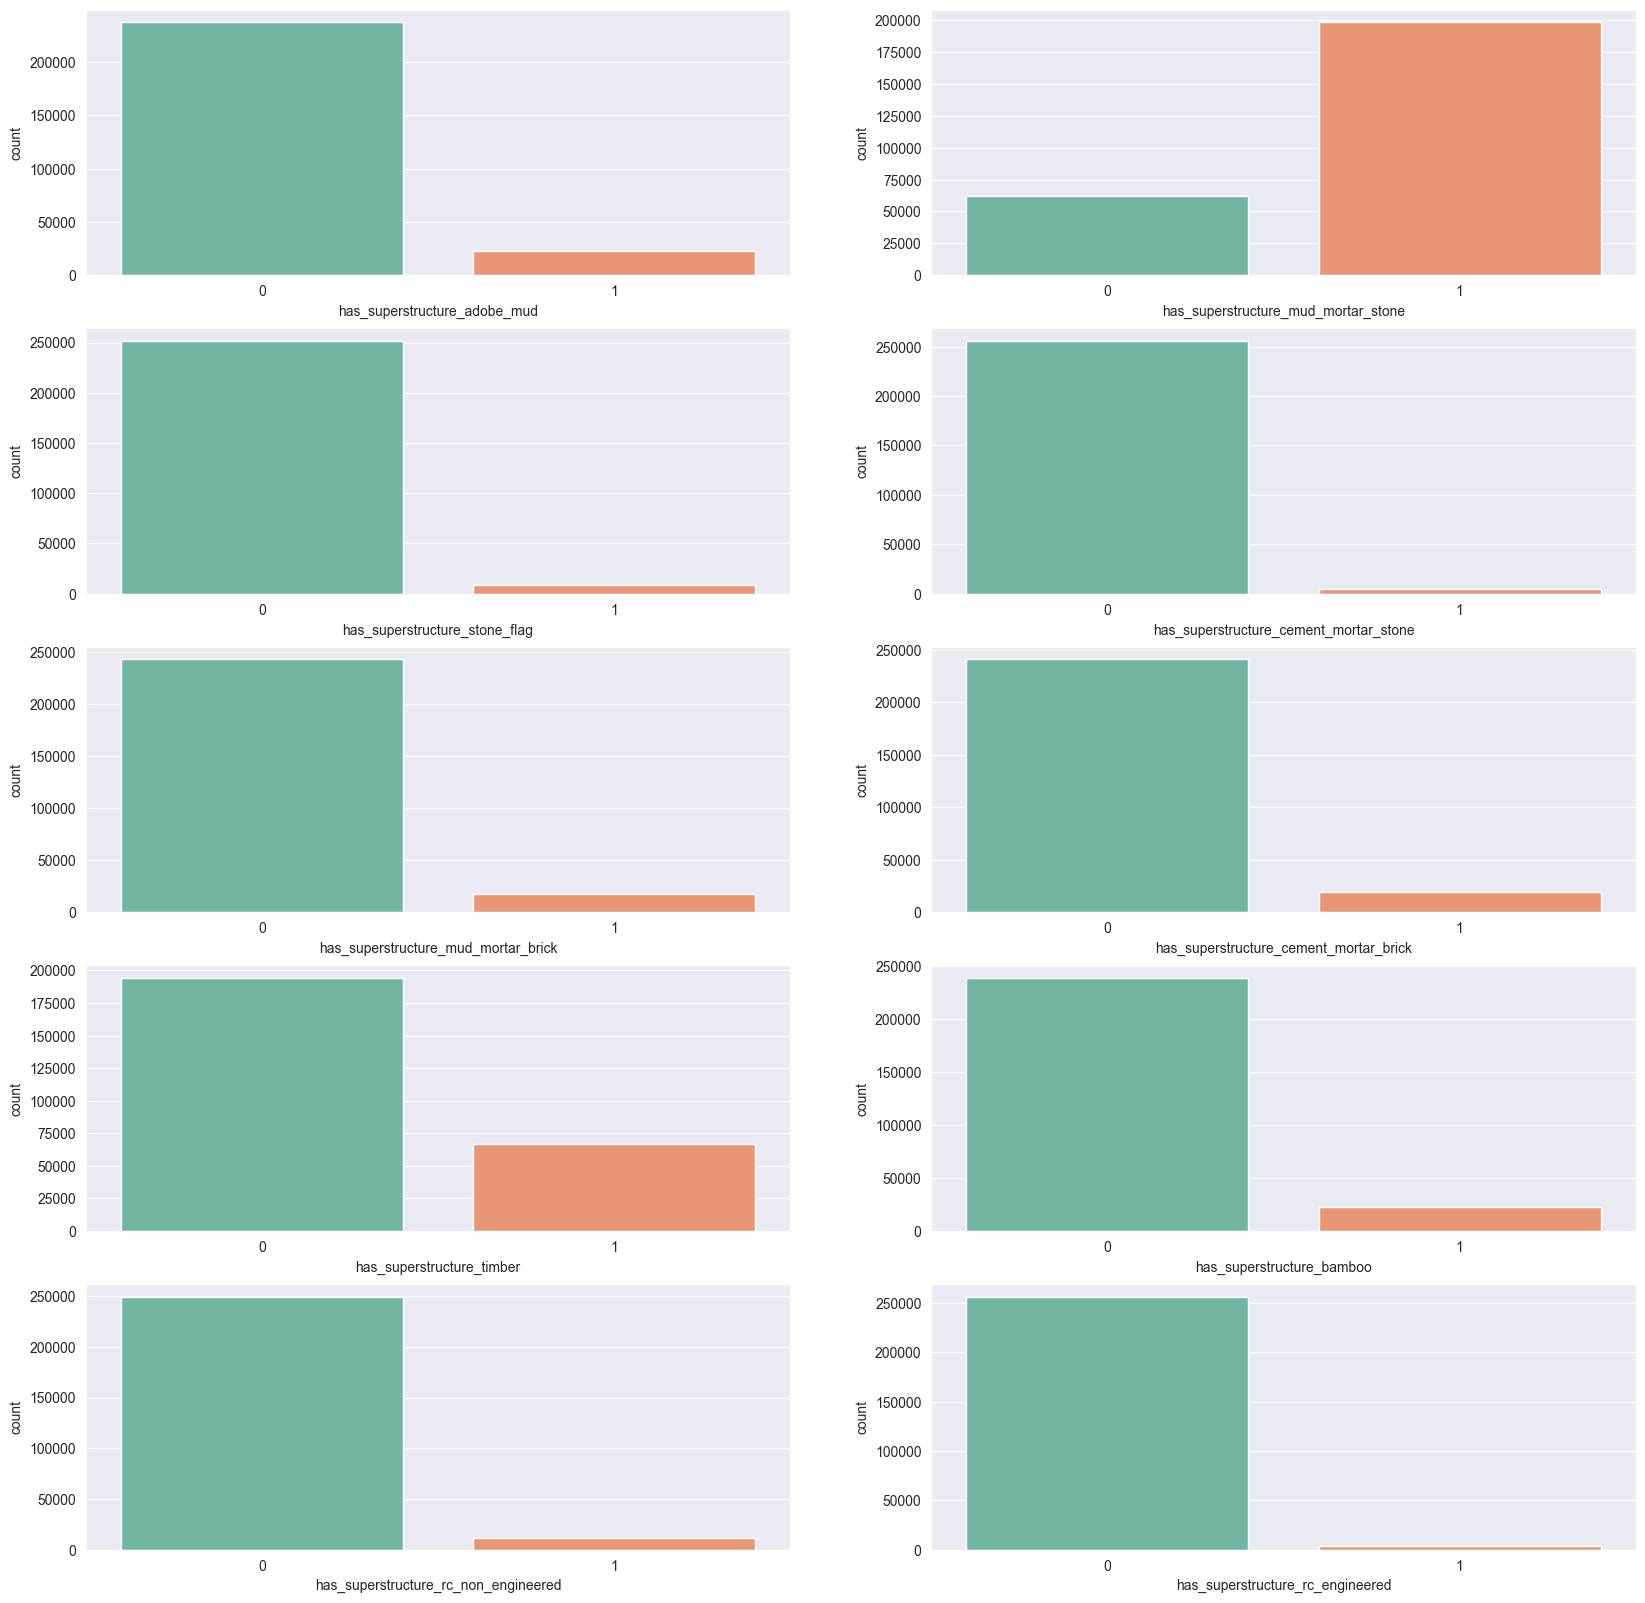

In [32]:
def plot_proportion(columns):
    fig, axes = plt.subplots(5, 2, figsize=(20, 20))
    for ax, col in zip(axes.flatten(), columns):
        sns.countplot(x=df[col], ax=ax, palette='Set2')
        ax.set_xlabel(col)
    plt.show()

plot_proportion(binary_features)

###  `UNIVARIATE ANALYSIS`

#### `area_percentage` feature

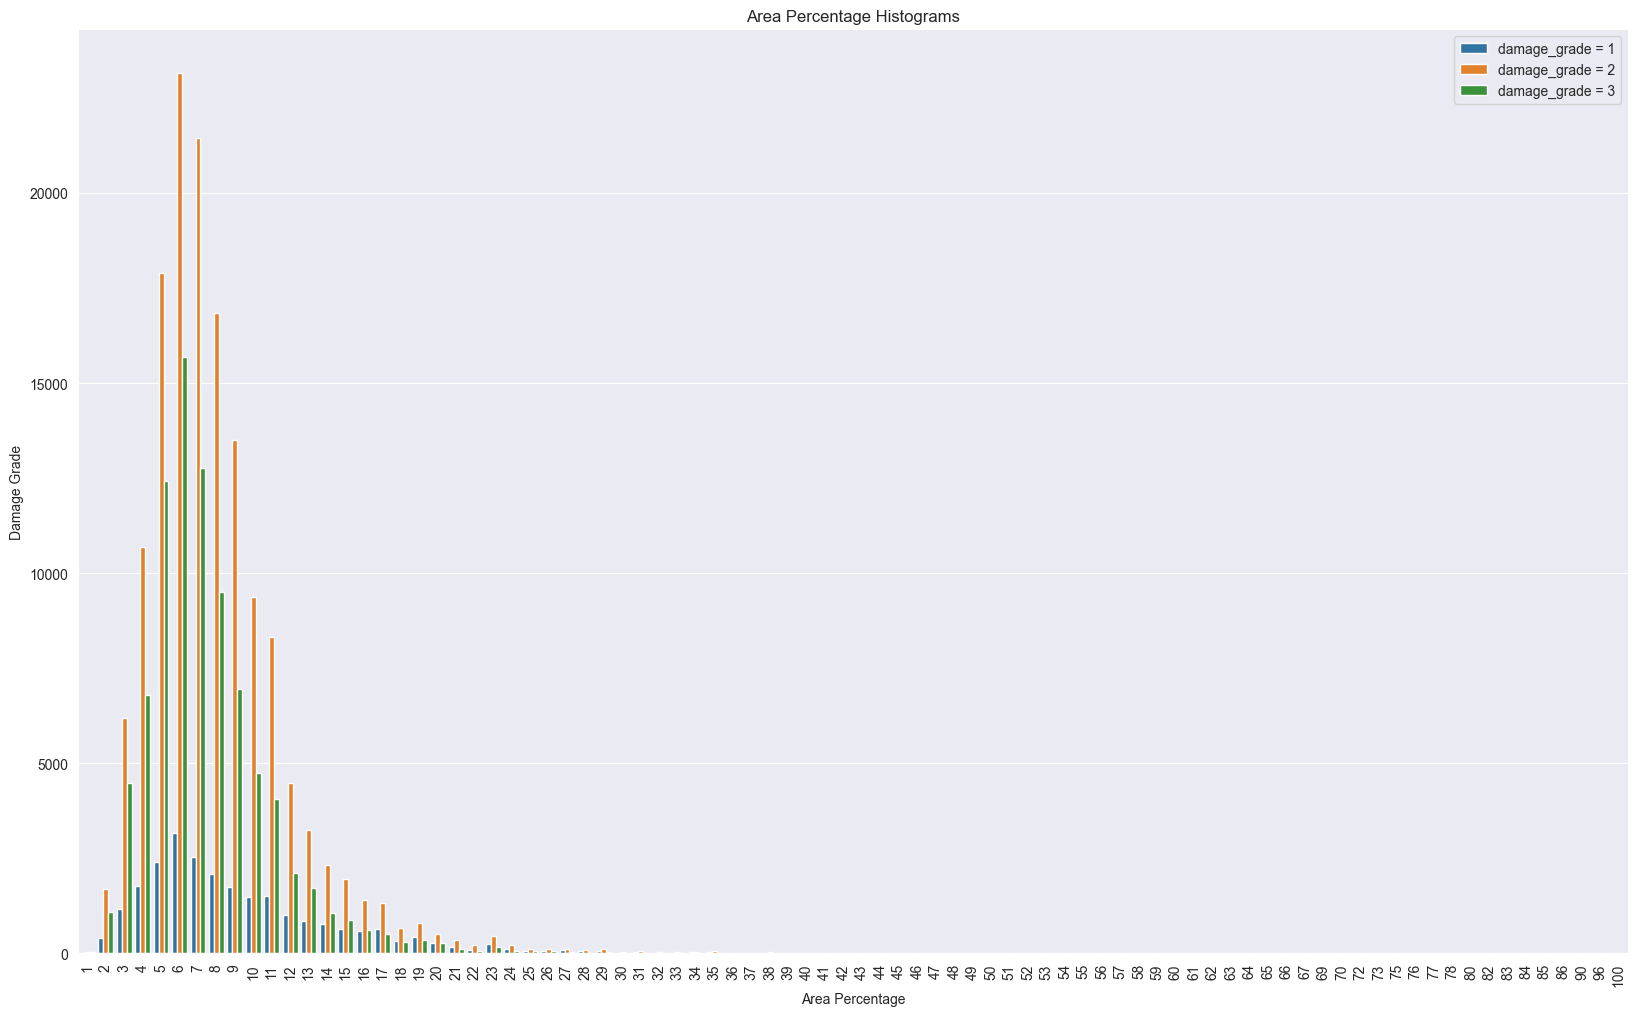

In [33]:
plt.figure(figsize=(20,12))
sns.countplot(x=df["area_percentage"],hue=df["damage_grade"])
plt.ylabel("Damage Grade")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

**Insight:**

 From this graph, we can see that the normalized area of the building footprint is less than around 20% for most of buildings. Also, some of the values reach to 100, which are not clearly visible in this chart as they are very few in numbers. Thus, we need to take care of the outliers for this feature.

#### `height_percentage`

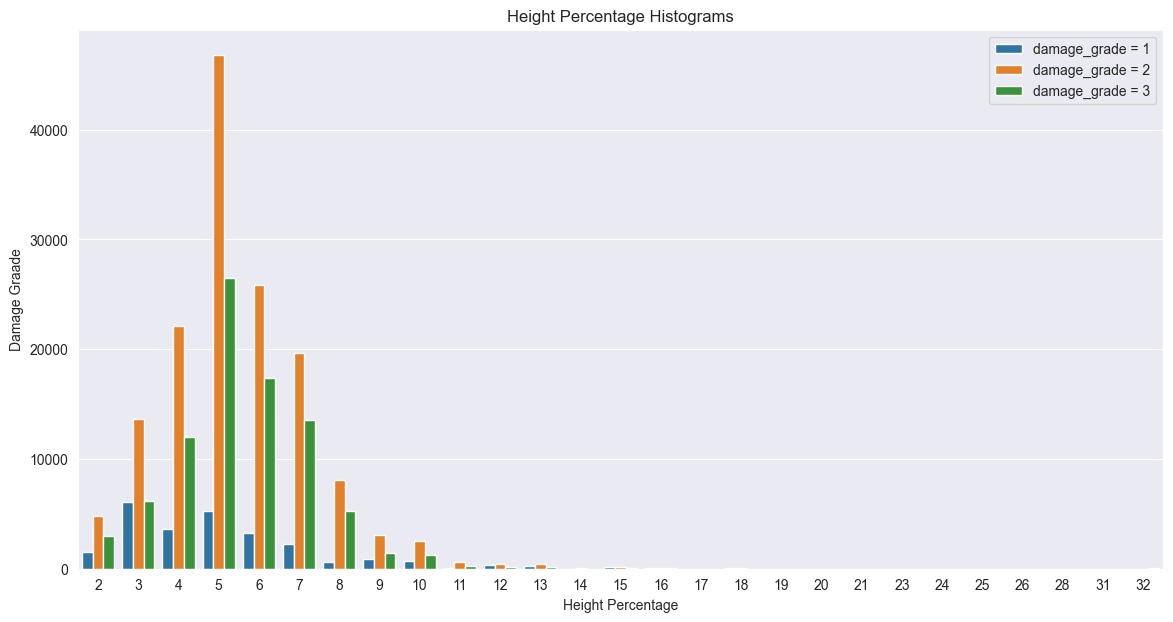

In [34]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["height_percentage"],hue=df["damage_grade"])
plt.ylabel("Damage Graade")
plt.xlabel("Height Percentage")
# plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

**Insights:**

We can see that most of the buildings have less than 10% height percentage in our dataset. Also, we have some buildings with values up to 32%.

### ` BIVARIATE ANALYSIS`

In [35]:
"""Function that shows count values of each categorical as well as binary features for each target class"""

def countplot_vis(attr, title):
    sns.countplot(x = attr, hue = df["damage_grade"])
    plt.title(f"{title} Distribution")
    plt.show()
    print(f"Unique Values are: {attr.unique()}")

#### `Land Surface Condition and Damage Grade`

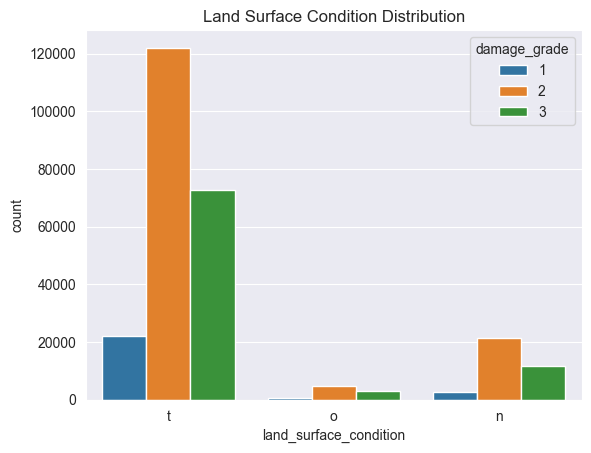

Unique Values are: ['t' 'o' 'n']


In [36]:
countplot_vis(df.land_surface_condition, "Land Surface Condition")

#### `Roof Type and Damage Grade`

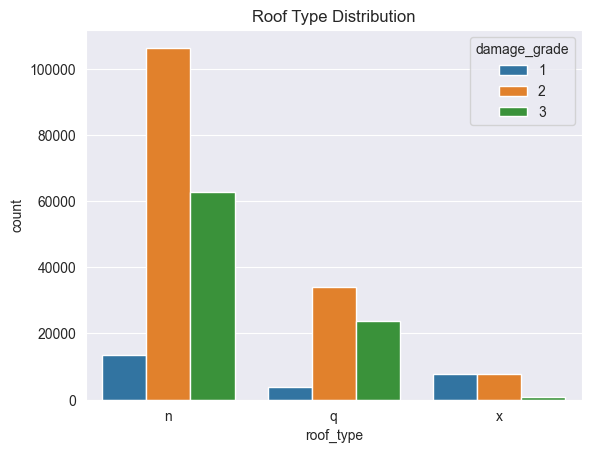

Unique Values are: ['n' 'q' 'x']


In [37]:
countplot_vis(df.roof_type, "Roof Type")

#### `Ground Floor Type and Damage Grade`

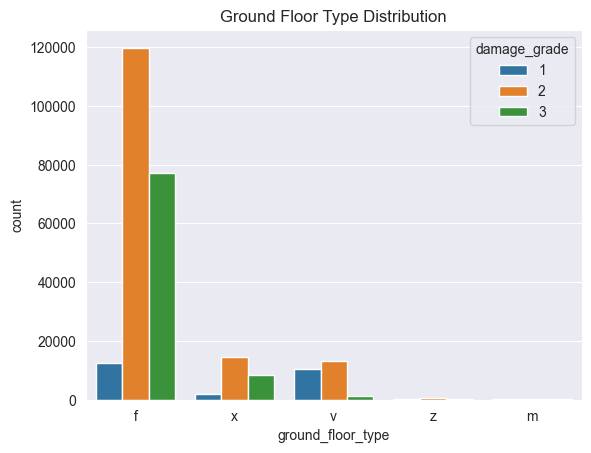

Unique Values are: ['f' 'x' 'v' 'z' 'm']


In [38]:
countplot_vis(df.ground_floor_type, "Ground Floor Type")

#### `Other Floor Type and Damage Grade`

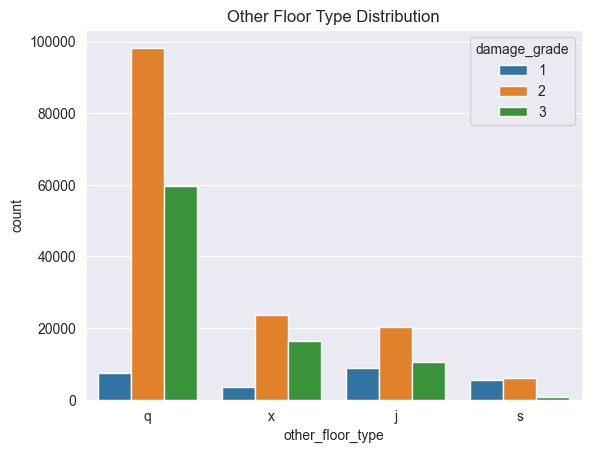

Unique Values are: ['q' 'x' 'j' 's']


In [39]:
countplot_vis(df.other_floor_type, "Other Floor Type")

#### `Plan Configuration and Damage Grade`

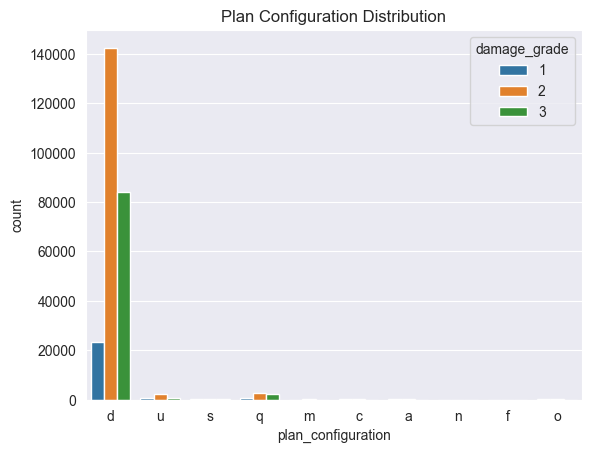

Unique Values are: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']


In [40]:
countplot_vis(df.plan_configuration, "Plan Configuration")

#### `Position Distribution and Damage Grade`

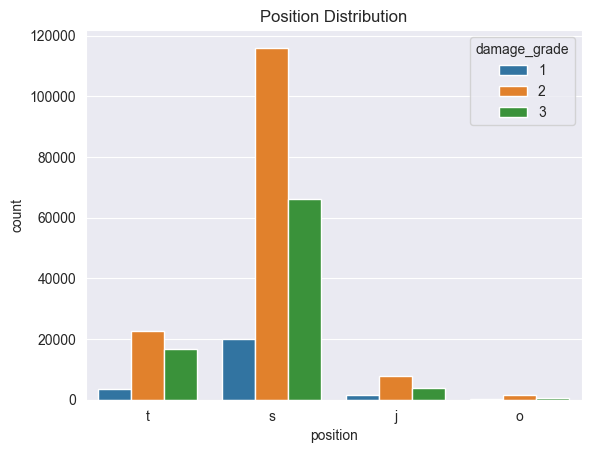

Unique Values are: ['t' 's' 'j' 'o']


In [41]:
countplot_vis(df.position, "Position")

#### `Has Superstructure Abode/Mud and Damage Grade`

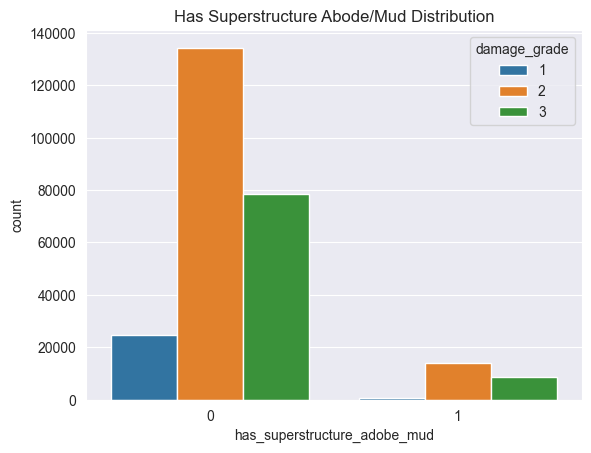

Unique Values are: [1 0]


In [42]:
countplot_vis(df.has_superstructure_adobe_mud, "Has Superstructure Abode/Mud")


#### `Has Superstructure Mud Mortar/Brick  and Damage Grade`

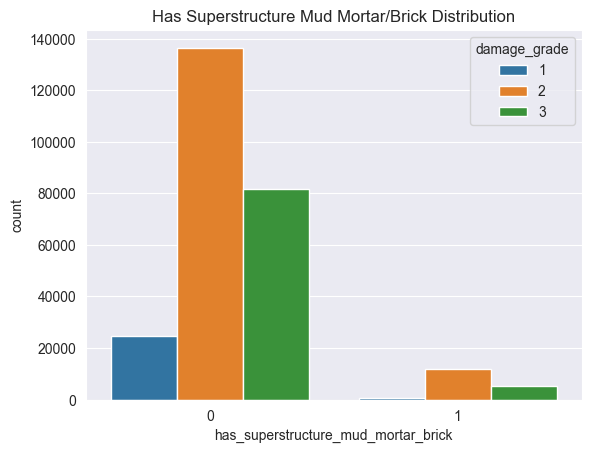

Unique Values are: [0 1]


In [43]:
countplot_vis(df.has_superstructure_mud_mortar_brick, "Has Superstructure Mud Mortar/Brick")


#### `Has Superstructure Mud Mortar/Stone and Damage Grade`

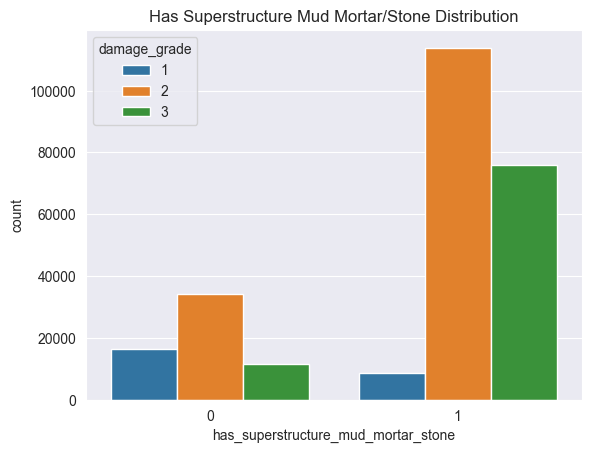

Unique Values are: [1 0]


In [44]:
countplot_vis(df.has_superstructure_mud_mortar_stone, "Has Superstructure Mud Mortar/Stone")


#### `Has Superstructure Timber and Damage Grade`

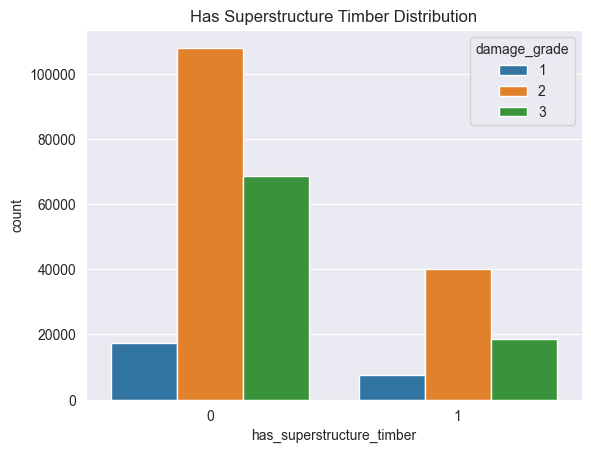

Unique Values are: [0 1]


In [45]:
countplot_vis(df.has_superstructure_timber, "Has Superstructure Timber")


#### `Has Superstructure Bamboo and Damage Grade`

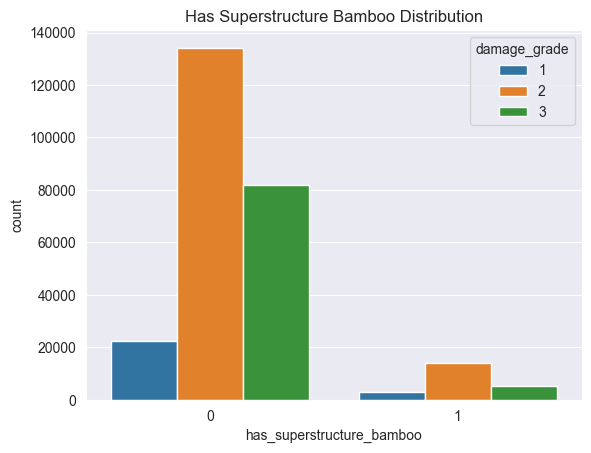

Unique Values are: [0 1]


In [46]:
countplot_vis(df.has_superstructure_bamboo, "Has Superstructure Bamboo")


#### `Has Superstructure Engineered Reinforced Concrete and Damage Grade`

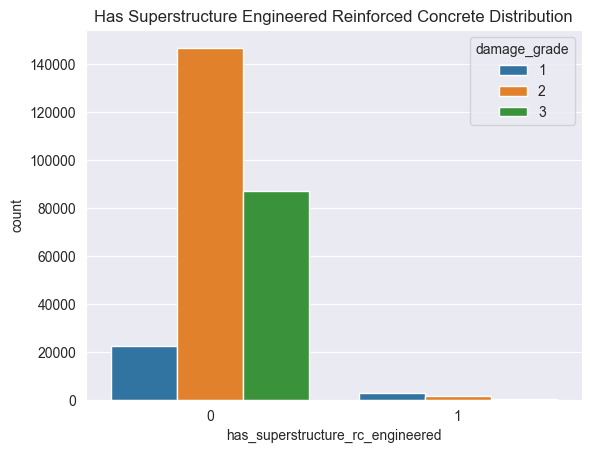

Unique Values are: [0 1]


In [47]:
countplot_vis(df.has_superstructure_rc_engineered, "Has Superstructure Engineered Reinforced Concrete")


#### `Has Superstructure Non-engineered Reinforced Concrete and Damage Grade`

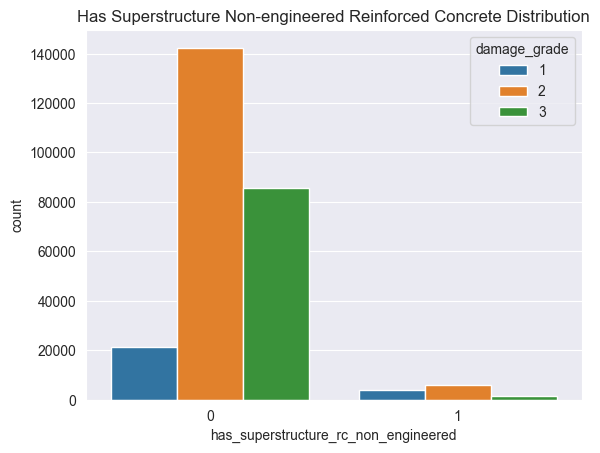

Unique Values are: [0 1]


In [48]:
countplot_vis(df.has_superstructure_rc_non_engineered, "Has Superstructure Non-engineered Reinforced Concrete")


#### Has Superstructure other and Damage Grade

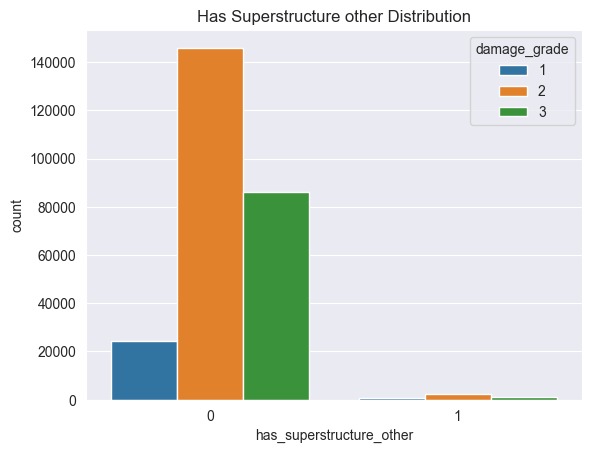

Unique Values are: [0 1]


In [49]:
countplot_vis(df.has_superstructure_other, "Has Superstructure other")


####`Legal Ownership Status and Damage Grade`

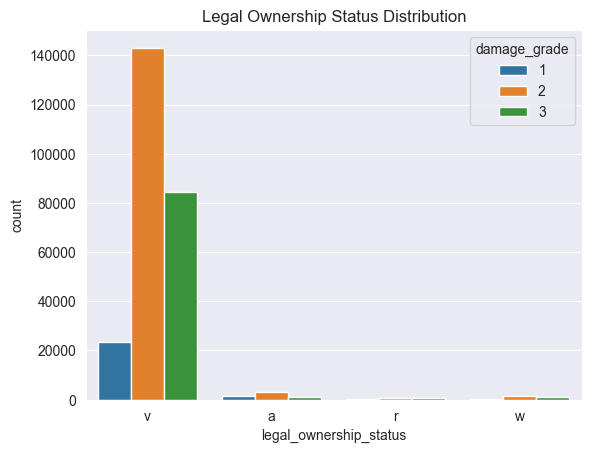

Unique Values are: ['v' 'a' 'r' 'w']


In [50]:
countplot_vis(df.legal_ownership_status, "Legal Ownership Status")


#### `Has Secondary Use and Damage Grade`

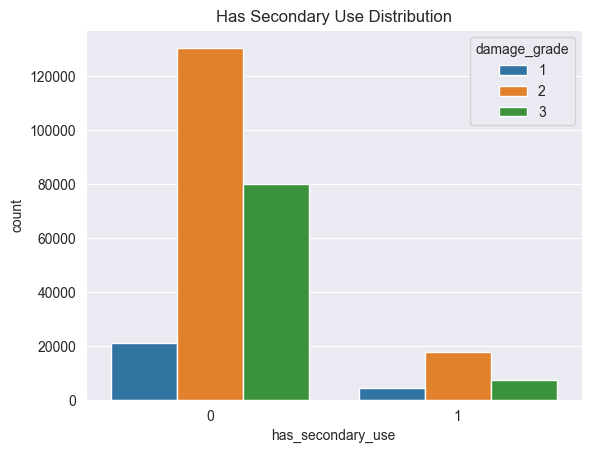

Unique Values are: [0 1]


In [51]:
countplot_vis(df.has_secondary_use, "Has Secondary Use")


#### `Has Secondary Use Agriculture and Damage Grade`

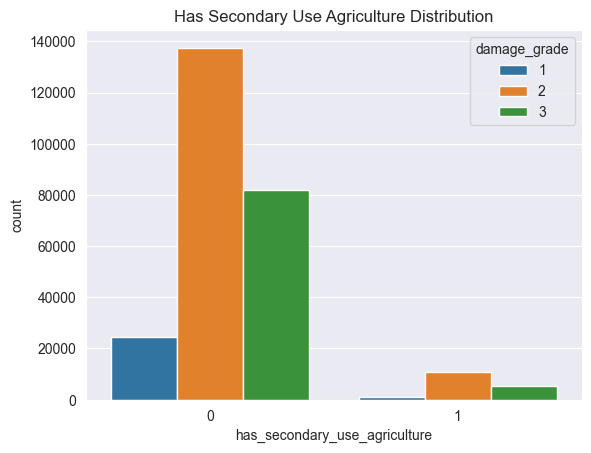

Unique Values are: [0 1]


In [52]:
countplot_vis(df.has_secondary_use_agriculture, "Has Secondary Use Agriculture")


#### `Has Secondary Use Hotel and Damage Grade`

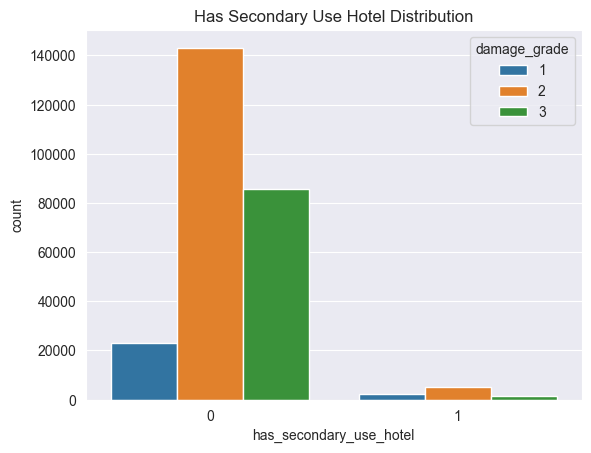

Unique Values are: [0 1]


In [53]:
countplot_vis(df.has_secondary_use_hotel, "Has Secondary Use Hotel")


#### `Has Secondary Use Rental and Damage Grade`

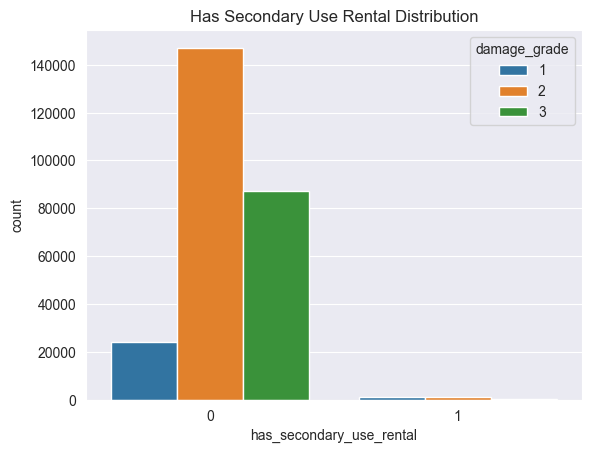

Unique Values are: [0 1]


In [54]:
countplot_vis(df.has_secondary_use_rental, "Has Secondary Use Rental")


#### `Has Secondary Use Institution and Damage Grade`

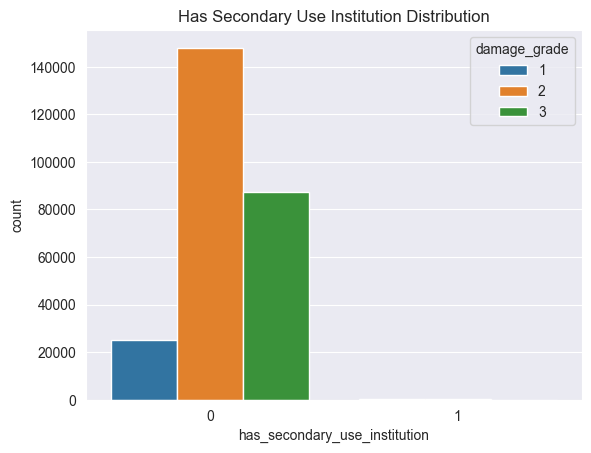

Unique Values are: [0 1]


In [55]:
countplot_vis(df.has_secondary_use_institution, "Has Secondary Use Institution")


#### `Has Secondary Use School and Damage Grade`

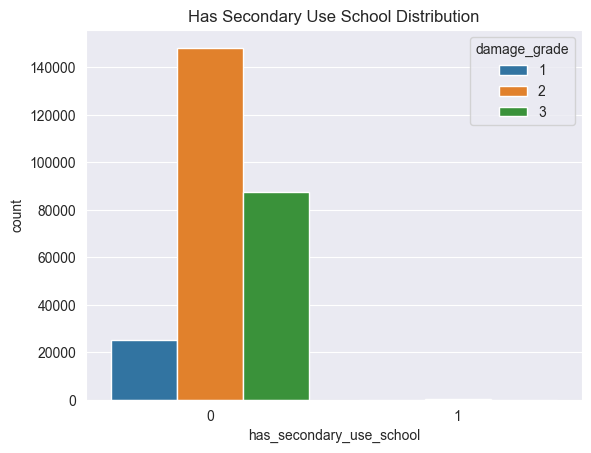

Unique Values are: [0 1]


In [56]:
countplot_vis(df.has_secondary_use_school, "Has Secondary Use School")


#### `Has Secondary Use Industry and Damage Grade`

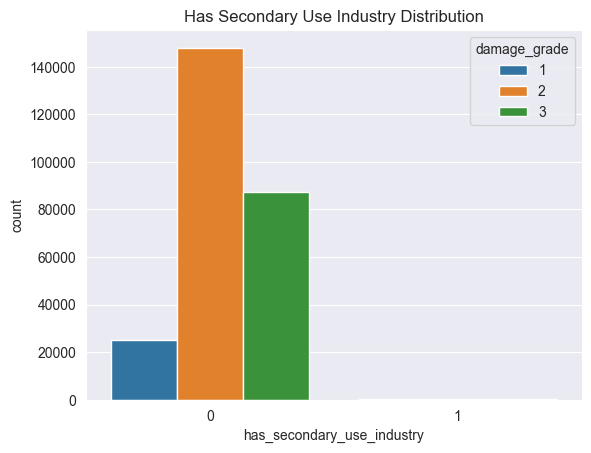

Unique Values are: [0 1]


In [57]:
countplot_vis(df.has_secondary_use_industry, "Has Secondary Use Industry")


#### `Has Secondary Use Health Post and Damage Grade`

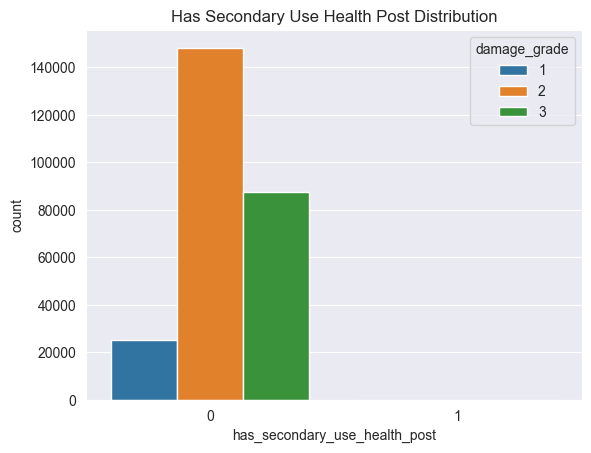

Unique Values are: [0 1]


In [58]:
countplot_vis(df.has_secondary_use_health_post, "Has Secondary Use Health Post")


#### `Has Secondary Use Government Office and Damage Grade`

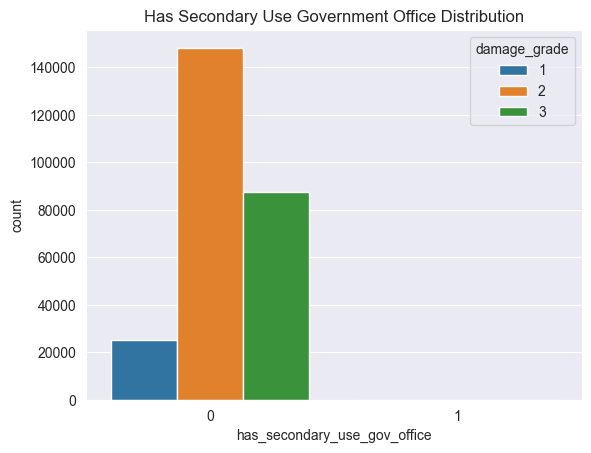

Unique Values are: [0 1]


In [59]:
countplot_vis(df.has_secondary_use_gov_office, "Has Secondary Use Government Office")


#### `Has Secondary Use Police and Damage Grade`

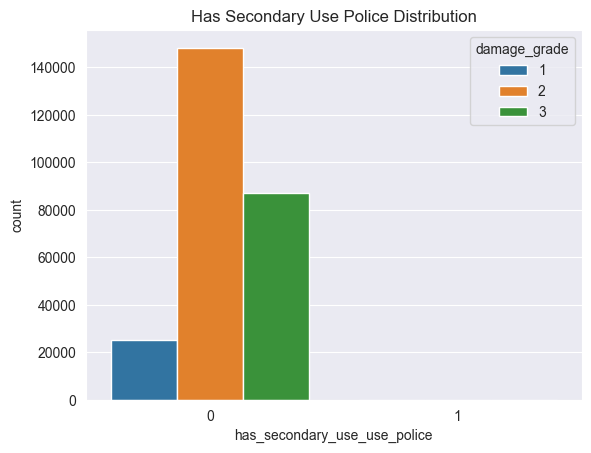

Unique Values are: [0 1]


In [60]:
countplot_vis(df.has_secondary_use_use_police, "Has Secondary Use Police")


#### `Has Secondary Use Other and Damage Grade`

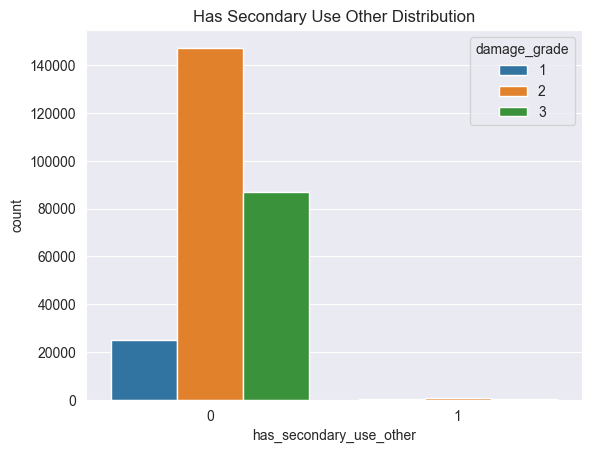

Unique Values are: [0 1]


In [61]:
countplot_vis(df.has_secondary_use_other, "Has Secondary Use Other")


#### `Number of families and Damage Grade`

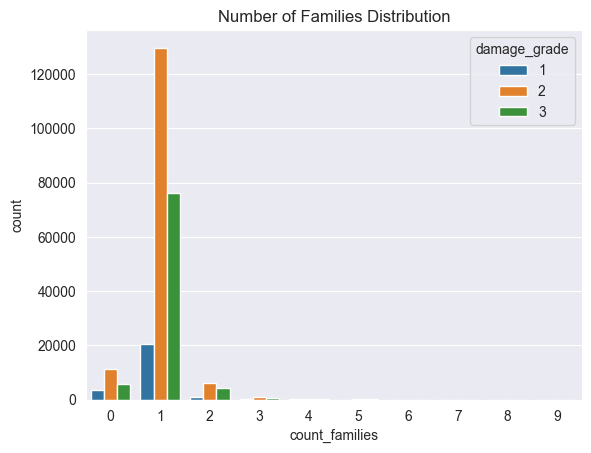

Unique Values are: [1 0 2 3 4 5 6 7 9 8]


In [62]:
countplot_vis(df.count_families, "Number of Families")


### `Correlation among Numerical Features`

In [65]:
df_numerical_features = df[numerical_features]

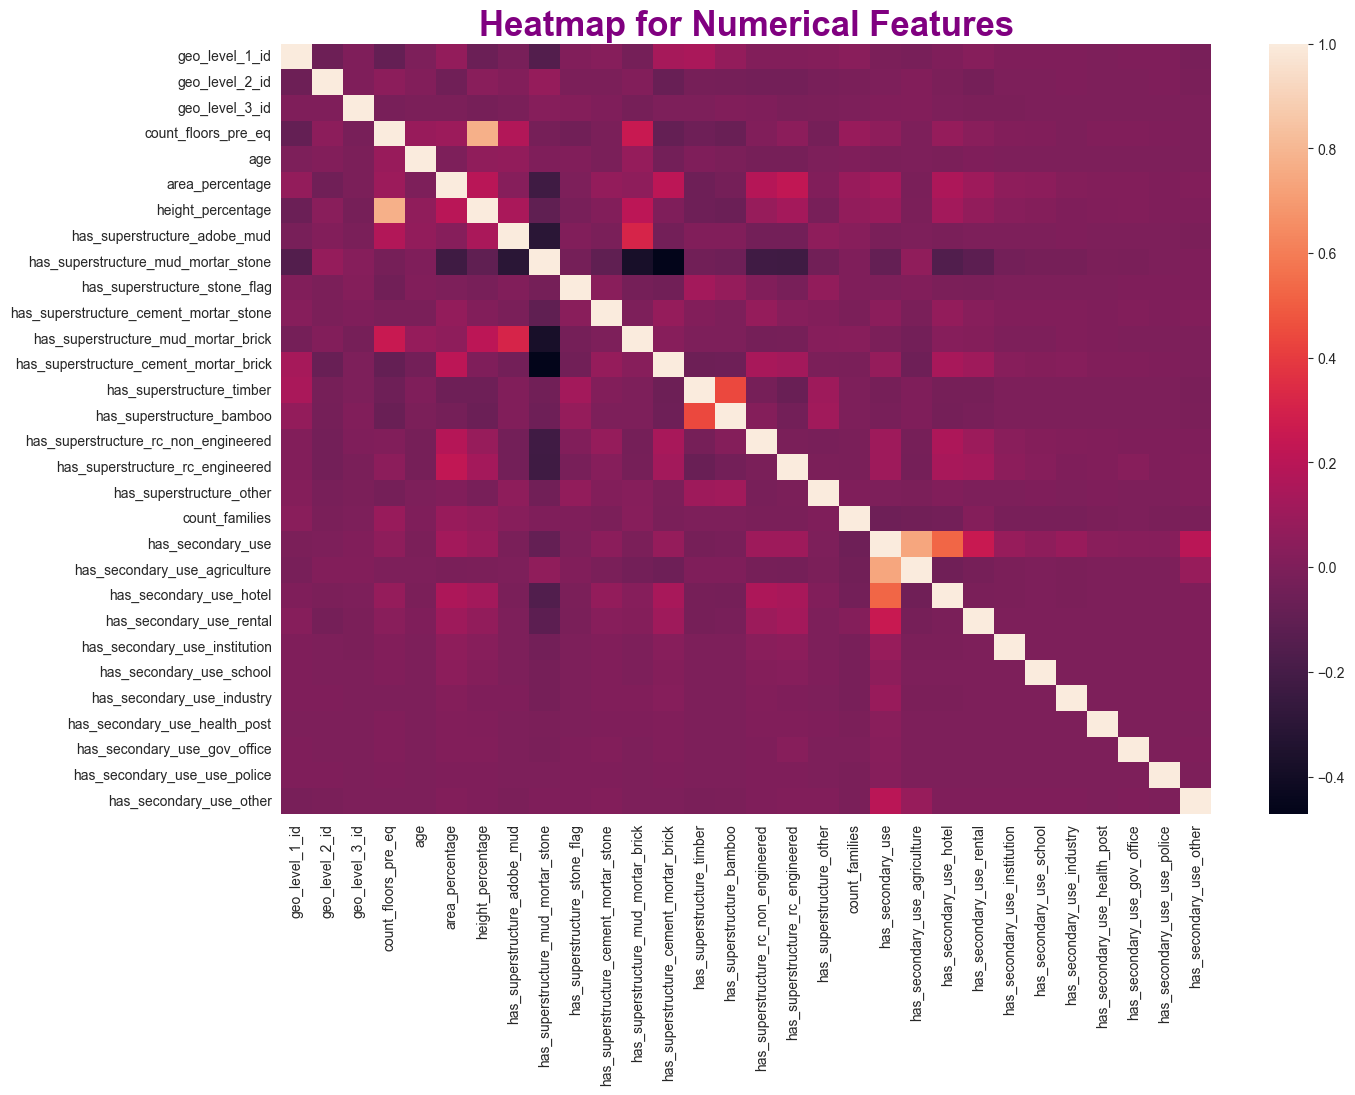

In [66]:
corr_matrix = df_numerical_features.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix)
plt.title(label='Heatmap for Numerical Features', fontsize=25, fontweight='bold').set_color('purple')
plt.show()

In [67]:
corr_matrix = df_numerical_features.corr().abs()

In [68]:
# Create a mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Replace values below 0.8 with NaNs
corr_matrix = corr_matrix.where(mask, np.nan)
corr_matrix = corr_matrix.stack()

# Select pairs of highly correlated features
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)]

In [69]:
high_corr

count_floors_pre_eq  height_percentage                0.772734
has_secondary_use    has_secondary_use_agriculture    0.739059
dtype: float64

Here we can see that `has_secondary_use` and `has_secondary_use_agriculture` has high correlation. Also, same with `count_floo_pre_eq` and `height_percentage`.But, these are not quite much correlated in order to remove from our dataset. We could remove if they are highly correlated at least more than 90%.

## Step-4: `Data Preprocessing`

### GLOBAL VARIABLES

In [70]:
RANDOM_SEED = 42

## i) OneHotEncoding using `get_dummies() function`

In [71]:
numerical_features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [72]:
X = df.copy()

# categorical_features = [
#     'land_surface_condition', 
#     'foundation_type', 
#     'roof_type',
#     'ground_floor_type', 
#     'other_floor_type', 
#     'position', 
#     'plan_configuration',
#     'legal_ownership_status']


# droping building_id and dependent variable damage_grade

X = X.drop(["damage_grade"], axis=1)


y = df["damage_grade"]


In [73]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [74]:
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [75]:
dummies = pd.get_dummies(X[cat_features], columns = cat_features)
dummies.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [76]:
X = pd.concat([X, dummies], axis=1, join='inner')
X = X.drop(columns = cat_features)

In [77]:
X.shape

(260601, 68)

In [78]:
y.shape

(260601,)

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## ii) Outlier Hanlding

> Let's handle outliers here using `Winsorization` technique.

#### `About Winsorization`

*What is the Winsorized Mean?*

>Winsorized mean is a method of averaging that initially replaces the smallest and largest values with the observations closest to them. This is done to limit the effect of outliers or abnormal extreme values, or outliers, on the calculation

In [80]:
outlier_features = ['area_percentage','age', 'height_percentage']

### `Age`

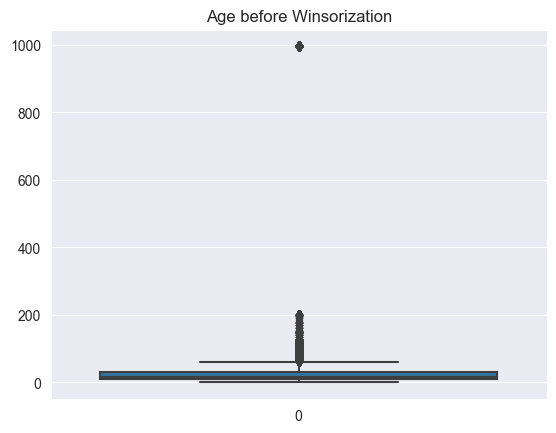

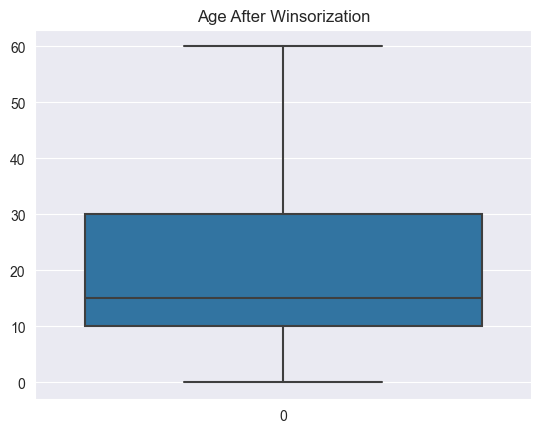

In [81]:
sns.boxplot(X["age"])
plt.title("Age before Winsorization")
plt.show()

X["age"] = winsorize(X["age"], (0, 0.05))

sns.boxplot(X["age"])
plt.title("Age After Winsorization")
plt.show()

### `Height Percentage`

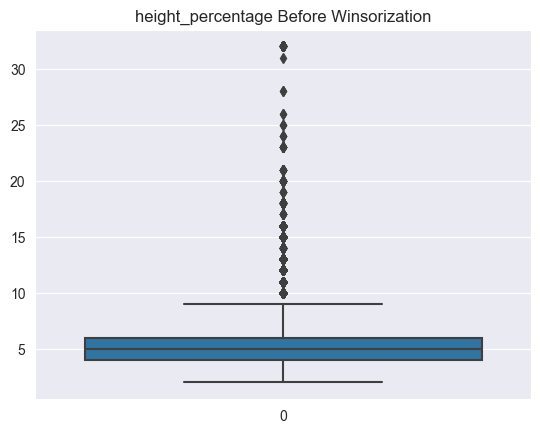

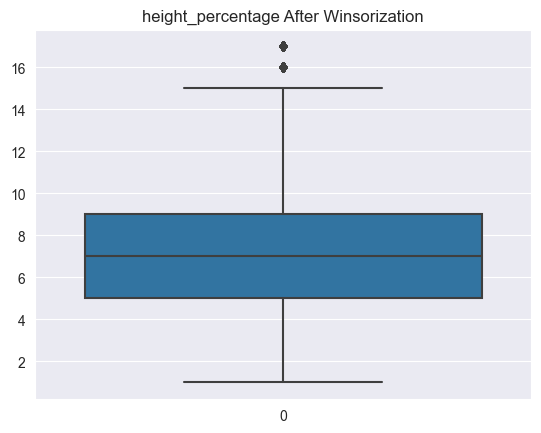

In [82]:
sns.boxplot(X['height_percentage'])
plt.title("height_percentage Before Winsorization")
plt.show()

X['height_percentage'] = winsorize(X['area_percentage'], (0, 0.04))

sns.boxplot(X['height_percentage'])
plt.title("height_percentage After Winsorization")
plt.show()

### `Area Percentage`

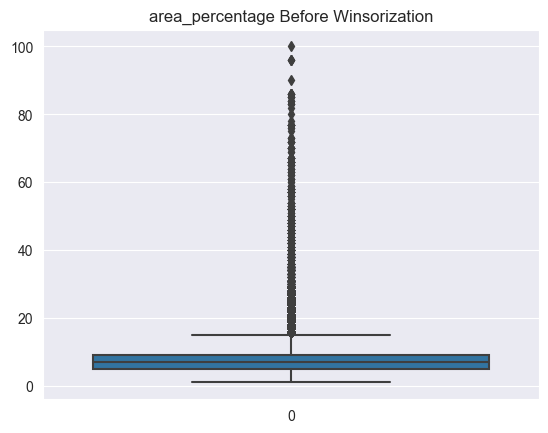

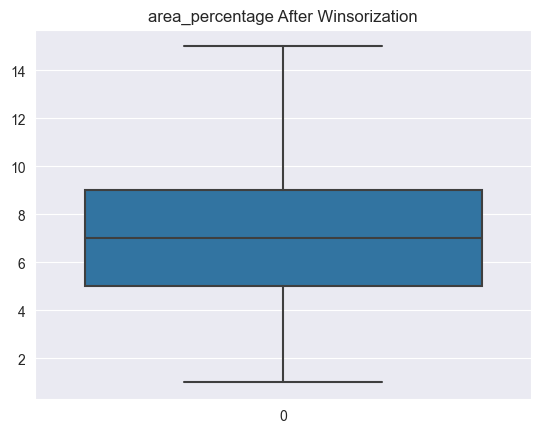

In [83]:
sns.boxplot(X['area_percentage'])
plt.title("area_percentage Before Winsorization")
plt.show()

X['area_percentage'] = winsorize(X['area_percentage'], (0, 0.055))

sns.boxplot(X['area_percentage'])
plt.title("area_percentage After Winsorization")
plt.show()

In [84]:
# sns.boxplot(X['count_floors_pre_eq'])
# plt.title("count_floors_pre_eq Before Winsorization")
# plt.show()

## iii) Standardization 
> Using `StandardScaler`, we are only performing standardization to numerical features only.

In [85]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,6,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,6,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [86]:
other_numerical_features

['height_percentage',
 'geo_level_3_id',
 'age',
 'geo_level_2_id',
 'geo_level_1_id',
 'area_percentage',
 'count_families',
 'count_floors_pre_eq']

In [87]:
other_num_df = X[other_numerical_features]
other_num_df.head()

scaler = StandardScaler()
X[other_num_df.columns] = scaler.fit_transform(other_num_df)

In [88]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.983414,-0.518705,1.629055,-0.178274,0.581808,-0.534636,-0.525796,1,1,0,0,0,0,0,0,0,0,0,0.038365,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.734459,0.481998,-0.945017,-0.178274,-0.642771,0.091205,0.057586,0,1,0,0,0,0,0,0,0,0,0,0.038365,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.883744,-0.819158,0.744612,-0.178274,-0.642771,-0.847557,-0.817487,0,1,0,0,0,0,0,0,0,0,0,0.038365,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.008221,-0.685893,1.216589,-0.178274,-0.642771,-0.534636,-0.525796,0,1,0,0,0,0,1,1,0,0,0,0.038365,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-0.361028,-1.381296,-1.308119,1.195989,0.581808,0.091205,0.057586,1,0,0,0,0,0,0,0,0,0,0,0.038365,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## iv) Data Splitting
> Spliting data into `train` and `validation` sets in the ratio of 0.8:0.2

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = RANDOM_SEED)

## v) Handling Imbalance Datasets

> In this section, we used following  techniques for handling imbalanced dataset :
> * Random Undersampling
> * Random Oversampling
> * SMOTE

###  `Random Undersampling`

In [90]:
under_sampler = RandomUnderSampler(random_state=RANDOM_SEED)
X_train_under_sample, y_train_under_sample = under_sampler.fit_resample(X_train, y_train)

In [91]:
print(f"Before Undersampling: {Counter(y_train)}")
print(f"After Undersampling: {Counter(y_train_under_sample)}")

Before Undersampling: Counter({1: 118772, 2: 69754, 0: 19954})
After Undersampling: Counter({0: 19954, 1: 19954, 2: 19954})


### `Random Oversampling`

In [92]:
over_sampler = RandomOverSampler(random_state=RANDOM_SEED)
X_train_over_sample, y_train_over_sample = over_sampler.fit_resample(X_train, y_train)

In [93]:
print(f"Before Undersampling: {Counter(y_train)}")
print(f"After Undersampling: {Counter(y_train_over_sample)}")

Before Undersampling: Counter({1: 118772, 2: 69754, 0: 19954})
After Undersampling: Counter({1: 118772, 2: 118772, 0: 118772})


### `SMOTE`

In [94]:
smote = SMOTE(random_state=RANDOM_SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [95]:
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_smote)}")

Before SMOTE: Counter({1: 118772, 2: 69754, 0: 19954})
After SMOTE: Counter({1: 118772, 2: 118772, 0: 118772})


## Step-5: `Saving Datasets`
> In this step, we saved our preprocessed dataset as well as save datasets after performing `undersampling`, `oversampling` and `SMOTE` so that this dataset can be directly loaded and fitted to our designed models in future.

In [96]:
"""Function to save our datasets into provided file path"""

def save_datasets(file_path, array):
    np.save(file_path, array)

###  Original Datasets

In [97]:
X_train_path = "data/Original/X_train.npy"
y_train_path = "data/Original/y_train.npy"
X_val_path = "data/Original/X_val.npy"
y_val_path = "data/Original/y_val.npy"

save_datasets(X_train_path, X_train)
save_datasets(y_train_path, y_train)
save_datasets(X_val_path, X_val)
save_datasets(y_val_path, y_val)

###  Undersampled datasets

In [98]:
X_train_path = "data/UnderSampling/X_train_undersample.npy"
y_train_path = "data/UnderSampling/y_train_undersample.npy"
X_val_path = "data/UnderSampling/X_val.npy"
y_val_path = "data/UnderSampling/y_val.npy"

save_datasets(X_train_path, X_train_under_sample)
save_datasets(y_train_path, y_train_under_sample)
save_datasets(X_val_path, X_val)
save_datasets(y_val_path, y_val)

###  Oversampled datasets

In [99]:
X_train_path = "data/OverSampling/X_train_oversample.npy"
y_train_path = "data/OverSampling/y_train_oversample.npy"
X_val_path = "data/OverSampling/X_val.npy"
y_val_path = "data/OverSampling/y_val.npy"

save_datasets(X_train_path, X_train_over_sample)
save_datasets(y_train_path, y_train_over_sample)
save_datasets(X_val_path, X_val)
save_datasets(y_val_path, y_val)

###  SMOTE

In [100]:
X_train_path = "data/SMOTE/X_train_smote.npy"
y_train_path = "data/SMOTE/y_train_smote.npy"
X_val_path = "data/SMOTE/X_val.npy"
y_val_path = "data/SMOTE/y_val.npy"

save_datasets(X_train_path, X_train_smote)
save_datasets(y_train_path, y_train_smote)
save_datasets(X_val_path, X_val)
save_datasets(y_val_path, y_val)

In [101]:
X.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land

>> **Cool !!!**
We've completed EDA and Preprocessing parts in this notebook. In next notebook, we will develop our ML models and fitted with these saved datasets and analyze their results for each different datasets we've created